<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week-2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [2]:
# type your code here
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [3]:
# type your code here
data = pd.read_csv('malaria.csv')

### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# type your code here
na_data = data.isna()
d = na_data.all(axis = 'columns') == True
d.index[d == True]

Int64Index([4, 21, 39, 99], dtype='int64')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# type your code here
a = data.isnull().sum()/len(data) * 100
 
sixty_percent =list(a[a>60].index)
sixty_percent

['Cases_Nigeria',
 'Cases_Senegal',
 'Cases_Spain',
 'Cases_Mali',
 'Deaths_Nigeria',
 'Deaths_Senegal',
 'Deaths_Spain',
 'Deaths_Mali']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# type your code here
data.columns

guinea = data[['Cases_Guinea','Deaths_Guinea']]
liberia = data[['Cases_Liberia','Deaths_Liberia']]
sierra = data[['Cases_SierraLeone','Deaths_SierraLeone']]
nigeria = data[['Cases_Nigeria','Deaths_Nigeria']]

print(guinea.isnull().sum().sum())
print(liberia.isnull().sum().sum())
print(sierra.isnull().sum().sum())
print(nigeria.isnull().sum().sum())


69
90
80
178


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
data.isnull().head(2)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
1,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True


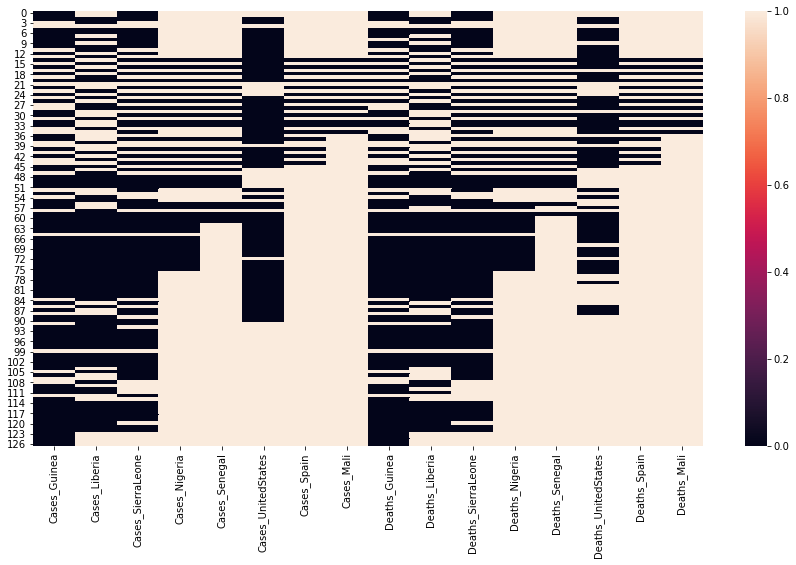

In [10]:
# type your code here
plt.figure(figsize = (15,8))
sns.heatmap(data.isnull())
plt.show()

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# type your code here
print(data.shape)
data_updated = data.dropna(thresh = 3)
print(data_updated.shape)

(127, 16)
(110, 16)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
sixty_percent

['Cases_Nigeria',
 'Cases_Senegal',
 'Cases_Spain',
 'Cases_Mali',
 'Deaths_Nigeria',
 'Deaths_Senegal',
 'Deaths_Spain',
 'Deaths_Mali']

In [13]:
# type your code here
data.drop(sixty_percent, axis = 1, inplace = True)
data.columns

Index(['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_UnitedStates', 'Deaths_Guinea', 'Deaths_Liberia',
       'Deaths_SierraLeone', 'Deaths_UnitedStates'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

44
0.9491336030709361
0


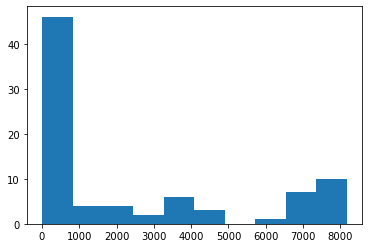

In [14]:
# type your code here
print(data['Cases_Liberia'].isnull().sum())
print(data['Cases_Liberia'].skew())
plt.hist(data['Cases_Liberia'])


data['Cases_Liberia'] = data['Cases_Liberia'].fillna(data['Cases_Liberia'].median())
print(data['Cases_Liberia'].isnull().sum())


plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

54
0.4685235032170701
14.068493150684931
0
Mean after filling na:  14.068493150684908


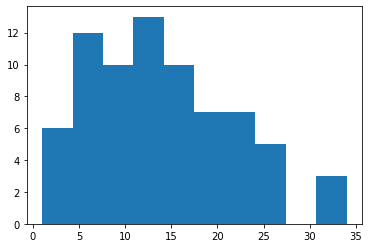

In [15]:
# type your code here
print(data['Cases_UnitedStates']. isnull().sum())
print(data['Cases_UnitedStates'].skew())
print(data['Cases_UnitedStates'].mean())
plt.hist(data['Cases_UnitedStates'])


data['Cases_UnitedStates'] = data['Cases_UnitedStates'].fillna(data['Cases_UnitedStates'].mean())
print(data['Cases_UnitedStates'].isnull().sum())
print("Mean after filling na: ",data['Cases_UnitedStates'].mean())

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

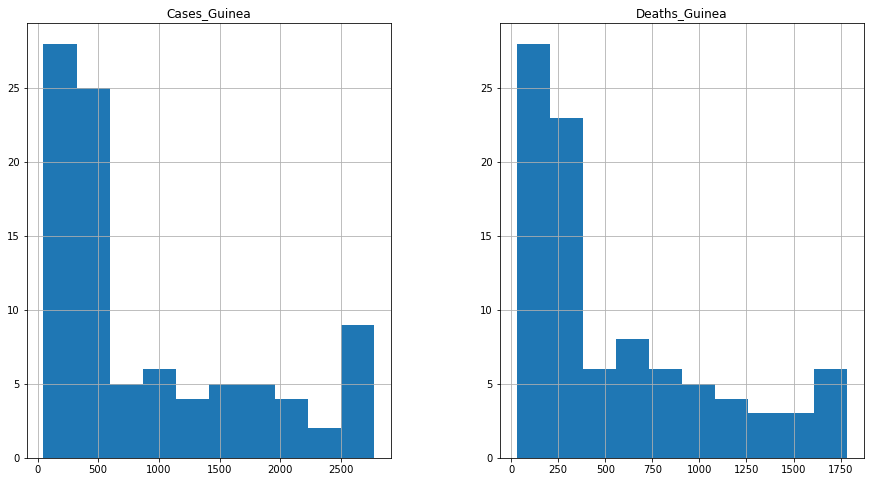

In [16]:
# type your code here
guinea.hist(figsize=(15,8))

plt.show()


In [17]:
guinea.head()

,Cases_Guinea,Deaths_Guinea
0,2776.0,1786.0
1,2775.0,1781.0
2,2769.0,1767.0
3,NaN,NaN
4,NaN,NaN


In [18]:
guinea = data[['Cases_Guinea','Deaths_Guinea']]
for i in guinea:
    guinea[i] = guinea.fillna(guinea[i]. median())
guinea.isnull().sum()

Cases_Guinea     0
Deaths_Guinea    0
dtype: int64

## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

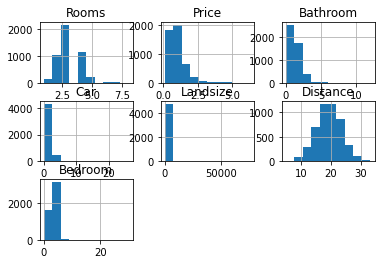

In [26]:
data = pd.read_csv('house.csv')
data.hist()
plt.show()

<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

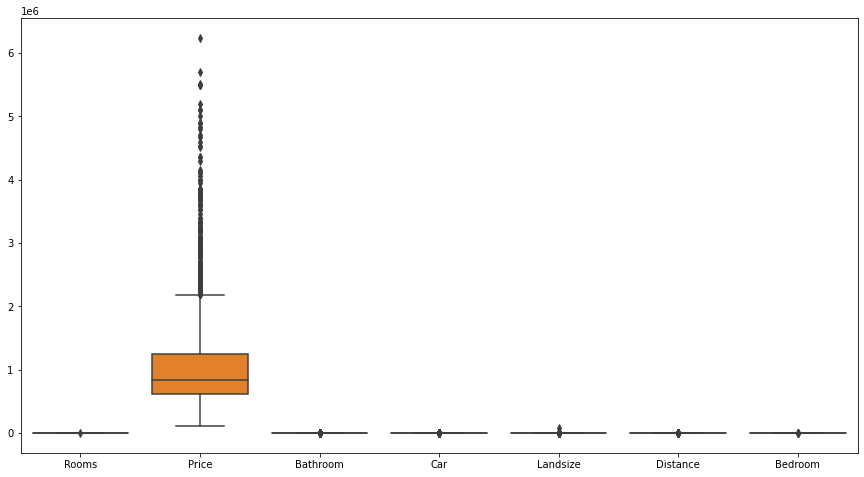

In [27]:
# type your code here
plt.figure(figsize=(15,8))
sns.boxplot(data=data)
plt.show()


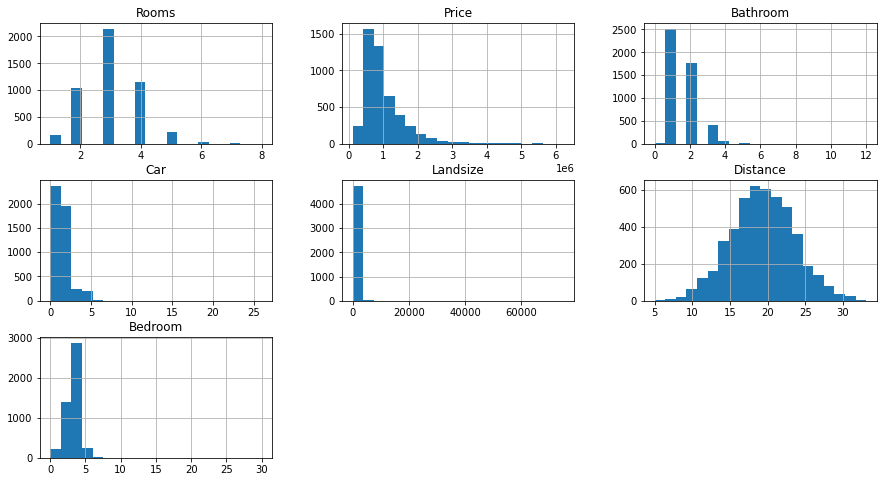

In [28]:
data.hist(bins=20, figsize=(15,8))

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

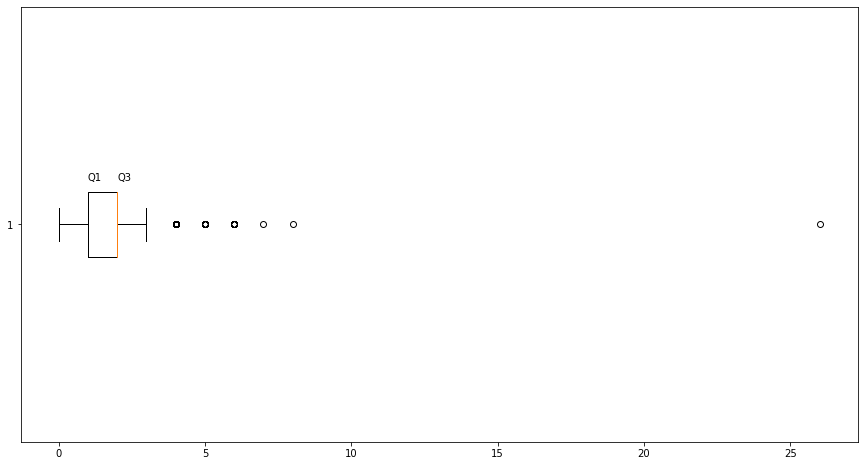

In [29]:
# type your code here
plt.figure(figsize=(15,8))
plt.boxplot(data['Car'], vert=False)
plt.text(x = data['Car'].quantile(0.75), y = 1.1, s= "Q3")
plt.text(x = data['Car'].quantile(0.25), y = 1.1, s= "Q1")

plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

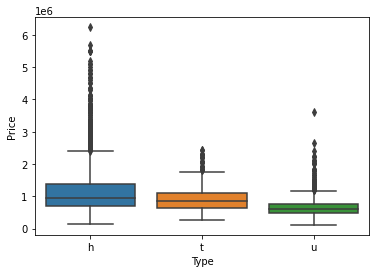

In [30]:
# type your code here
sns.boxplot(data['Type'], data['Price'])

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

[7, 7, 6, 6, 6, 7, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 7, 6, 8, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6]


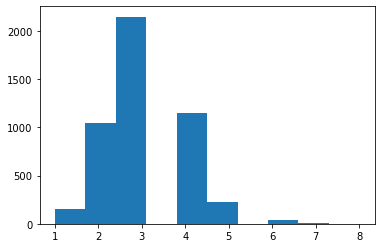

In [31]:
# type your code here
outliers = []
def detect_outliers(x):
    threshold = 3
    mean = np.mean(x)
    std = np.std(x)
    
    for i in x:
        z_score = (i-mean)/std
        
        if np.abs(z_score)> threshold:
            outliers.append(i)
            
    return outliers

print(detect_outliers(data.Rooms))
plt.hist(data['Rooms'])
plt.show()

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4766 entries, 0 to 4765
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rooms       4766 non-null   int64  
 1   Type        4766 non-null   object 
 2   Price       4766 non-null   int64  
 3   Method      4766 non-null   object 
 4   Regionname  4766 non-null   object 
 5   Bathroom    4766 non-null   int64  
 6   Car         4766 non-null   int64  
 7   Landsize    4766 non-null   int64  
 8   Distance    4766 non-null   float64
 9   Bedroom     4766 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 372.5+ KB


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

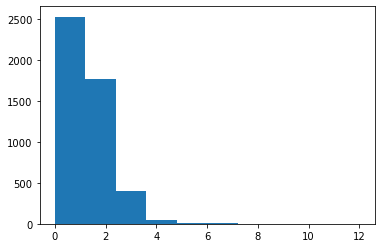

In [33]:
# type your code here
plt.hist(data['Bathroom'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

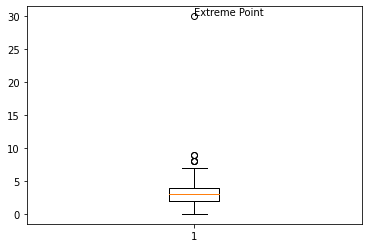

In [34]:
# type your code here
plt.boxplot(data['Bedroom'])
plt.text(x=1, y=30.1, s="Extreme Point")
plt.show()


In [35]:
q1 = data['Bedroom'].quantile(0.25)
q3 = data['Bedroom'].quantile(0.75)

IQR = q3-q1

data[data['Bedroom'] > q3+3*IQR]


,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
1937,3,h,496000,S,Western Metropolitan,1,1,0,21.7,30


<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

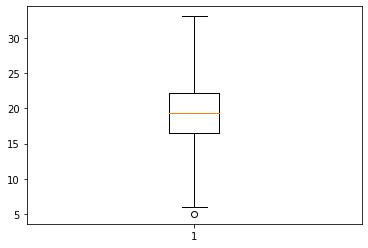

In [36]:
# type your code here
plt.boxplot(data['Distance'], whis=2)
plt.show()

In [37]:
print(data['Distance'].mean())

q1 = data['Distance'].quantile(0.25)
q3 = data['Distance'].quantile(0.75)

IQR = q3-q1

data_updated = data[~((data['Distance']>(q3+1.5*IQR)) | (data['Distance']<(q1-1.5*IQR)))]

print(data_updated['Distance'].mean())

19.32834662190515
19.311425554382247


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

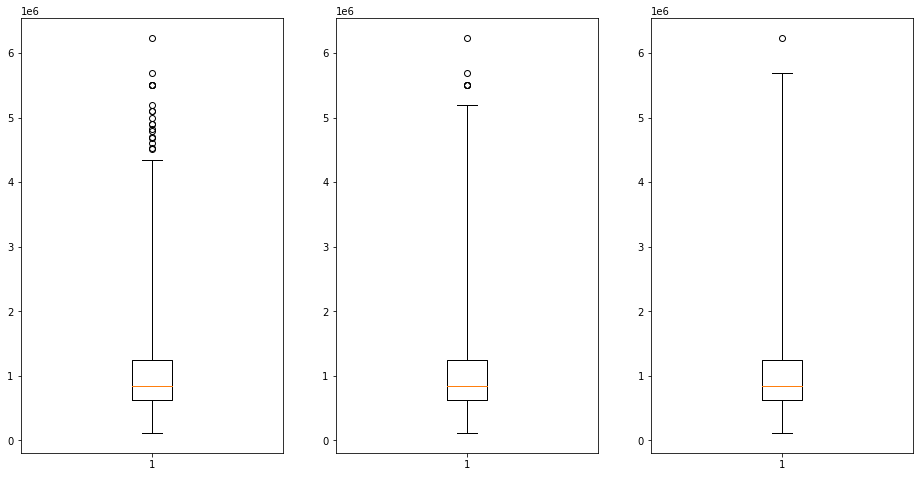

In [38]:
# type your code here
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.boxplot(data['Price'], whis=5)
plt.subplot(1,3,2)
plt.boxplot(data['Price'], whis=6.5)
plt.subplot(1,3,3)
plt.boxplot(data['Price'], whis=7.5)
plt.show()

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
# type your code here
data.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


In [40]:
data['Distance'].describe()


count    4766.000000
mean       19.328347
std         4.230650
min         5.000000
25%        16.500000
50%        19.300000
75%        22.200000
max        33.100000
Name: Distance, dtype: float64

In [41]:
def label(x):
    if x>=5 and x<15:
        return "Walkable Distance"
    elif x>=15 and x<25:
        return "Close by"
    else:
        return "Far away"
    
data['Distance Cat'] = data['Distance'].apply(label)

data.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,Distance Cat
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,Far away
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,Close by
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,Close by
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,Close by
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,Close by


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

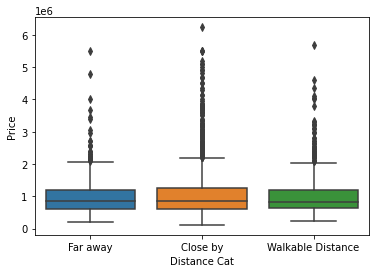

In [42]:
# type your code here
sns.boxplot(data['Distance Cat'], data['Price'])
plt.show()

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here